<a href="https://colab.research.google.com/github/tanishq252/AI-ML-DS-Learning-Series/blob/main/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing libraries and dataset


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataSet = pd.read_csv('Position_Salaries.csv')
dataSet

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [5]:
x = dataSet.iloc[:,1:-1].values
y = dataSet.iloc[:,-1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
# we need y in form of 2D array so as to perform feature scaling
# following command to convert 1D array to 2D array
# y= y.reshape(len(y), 1)
y = np.array(y).reshape(-1,1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

##Feature Scaling 

In [7]:
from sklearn.preprocessing import StandardScaler

sc_y= StandardScaler()
sc_x= StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [8]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [9]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


##Trainig the SVR model

In [10]:
# from sklearn.svm import SVR
# svrModel = SVR(kernel = 'linear')
# svrModel.fit(x, y)
# svrModel.score(x,y)
# 45% accuracy

from sklearn.svm import SVR
svrModel = SVR(kernel = 'rbf')
svrModel.fit(x, y)
svrModel.score(x,y)
# 75% accuracy

# from sklearn.svm import SVR
# svrModel = SVR(kernel = 'poly')
# svrModel.fit(x, y)
# svrModel.score(x,y)
# 65% accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7516001070620798

##Let us Visualize the SVR model(without reverse feature scaling)



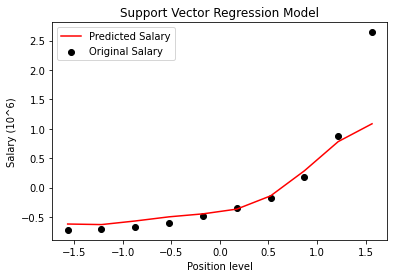

In [11]:
plt.scatter(x, y, color = 'black')
plt.plot(x , svrModel.predict(x), color = 'red')
plt.title("Support Vector Regression Model")
plt.xlabel("Position level")
plt.legend(['Predicted Salary', "Original Salary"]) 
plt.ylabel("Salary (10^6)")
plt.show()

##In order to compare it along with linear Regression we will make a linear regression model and visualise it properly(without reverse feature scaling)

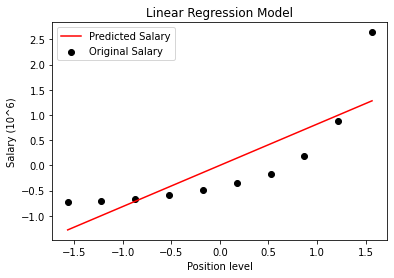

In [12]:
from sklearn.linear_model import LinearRegression

# fitting the model
linearModel = LinearRegression()
linearModel.fit(x,y)

# visualisation
plt.scatter(x, y, color = 'black')
plt.plot(x ,linearModel.predict(x), color = 'red')
plt.title("Linear Regression Model")
plt.xlabel("Position level")
plt.legend(['Predicted Salary', "Original Salary"]) 
plt.ylabel("Salary (10^6)")
plt.show()

##Predicting a new result

In [13]:
level = input("Enter the position level to check the Salary : ")
level = np.array(level).reshape(-1,1)
# we need to scale the input value aswell
print(svrModel.predict(sc_x.transform(level)))

Enter the position level to check the Salary : 8
[0.28557658]


In [14]:
# now the above value is not the expected value, why?
# Because we have performed feature scaling so we have to perform reverse feature scaling... even for visualisation part ;)

#Reversing the scaling and predict new Values
###standardScaler().inverse_transform()
###above code is used to reverse the scaling

In [22]:
# level = input("Enter the position level to check the Salary : ")
# level = np.array(level).reshape(-1,1)
# we need to scale the input value aswell
ans = ((svrModel.predict(sc_x.transform([[6.5]]))))

In [23]:
# below code is the most useful to get the normal answer instead of scaled answer
sc_y.inverse_transform(ans.reshape(-1,1))

array([[170370.0204065]])

In [25]:
level = input("Enter the position level to check the Salary : ")
level = np.array(level).reshape(-1,1)
answer  = (svrModel.predict(sc_x.transform(level)))
print("Predicted Salary using SVR is : ",sc_y.inverse_transform(answer.reshape(-1,1))[0][0])

Enter the position level to check the Salary : 7
Predicted Salary using SVR is :  209410.2313292346


In [ ]:
# we are getting proper results even on test Data

##Visualizing SVR with inverse scaling

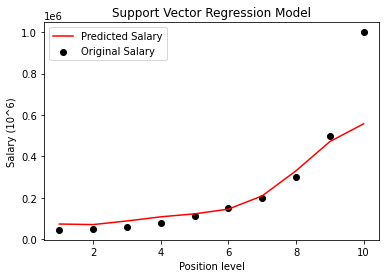

In [28]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'black')
# the below line is a bit challenging as you have to convert it into arrays
plt.plot(sc_x.inverse_transform(x) , sc_y.inverse_transform(np.array(svrModel.predict(x)).reshape(-1,1)), color = 'red')
plt.title("Support Vector Regression Model")
plt.xlabel("Position level")
plt.legend(['Predicted Salary', "Original Salary"]) 
plt.ylabel("Salary (10^6)")
plt.show()

In [ ]:
# SVR is best for linear and non linear data sets as we can choose various types of kernels as per our choice
# Just we have to take care of feature scaling as it is the most crucial concept  